# Trabajo Práctico Clasificación 2025 - Lisandro Duhalde

## Descripción del proyecto

En este notebook se aborda un problema de **clasificación supervisada**, aplicando distintos modelos de aprendizaje automático sobre un conjunto de datos etiquetado.  
Se realiza un análisis exploratorio de los datos, preprocesamiento de variables y entrenamiento de modelos, evaluando su desempeño mediante métricas como **accuracy**, **precision**, **recall** y **matriz de confusión**.

El objetivo es comparar el rendimiento de los distintos clasificadores y analizar su comportamiento en función de los datos disponibles.


## Modelos utilizados
- Regresión Logística
- K-Nearest Neighbors
- Árboles de Decisión / Random Forest
- Support Vector Machine


Cargamos la librería que nos permite acceder al dataset

In [ ]:
# soporte para cargar dataset de https://www.openml.org/
!pip install openml
import openml

Accedemos al dataset

In [ ]:
import pandas as pd

# se debe indicar aquí cual es el dataset que han elegido de OPENML
dataset = openml.datasets.get_dataset(37) # NO USAR EL DATASET 50

# separamos las información almacenada en el dataset
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)

X

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


# Actividades

a) El dataset elegido en este caso es el dataset número 37 (Pima Indians Diabetes Database).

Este dataset contiene información sobre mujeres de 21 años o más, de herencia indígena Pima. Tiene 768 filas, que representan 768 mujeres, y como columnas tiene los siguientes atributos: Número de embarazos, concentración de glucosa, presión arterial, grosor de pliegue cutáneo, insulina, IMC, función pedigrí de diabetes y edad.

El objetivo de aplicar técnicas de clasificación en este caso, será crear un clasificador que pueda predecir correctamente, a partir de los datos de entrenamiento que le proporcionamos (este dataset), si una paciente tiene o no tiene diabetes.




b) Para este dataset, vamos a aplicar dos técnicas de pre-procesamiento.

Primero vamos a realizar imputación para tratar los valores faltantes. Algunas filas contienen ceros en casos físicamente imposibles, como el Índice de Masa Corporal (IMC) o la Presión Arterial. Estos ceros representan valores faltantes, por ende, vamos a reemplazarlos por la mediana de la columna. Eliminar estas tuplas no es una buena opción, ya que se perdería aproximadamente la mitad de las filas por valores faltantes, y nos quedaría una muestra muy pequeña, lo que reduciría el poder del clasificador.


Segundo, vamos a escalar las 8 variables utilizando la Estandarización (StandardScaler). Este escalado sirve para que las variables con rangos más grandes no predominen por encima de las variables con rangos más pequeños. De esta forma, todas las variables contribuyen por igual al algoritmo de clasificación. Para este caso, optamos por la Estandarización por encima de la Normalización, ya que el dataset contiene valores atípicos (outliers), principalmente en la columna de Insulina. Estos outliers podrían afectar el MinMaxScaler (Normalización) al basarse en el valor mínimo y máximo absoluto, distorsionando toda la escala.

c) Como primera tecnica vamos a usar arboles de clasificacion, ya que es facil entender como el modelo llega a una prediccion cuando algun valor indica posible diabetes.

Como segunda tecnica vamos a utilizar KNN, ya que se beneficia del escalado que hicimios previamente y es un buen punto de referencia.  

Para la evaluacion se usara cross-validation, debido a que el dataset no es tan grande y hold-out reduciria demasiado el conjunto de prueba. Cross-validation aprovecha todos los datos, por ende en este caso sera mas estable. Se eligieron 10 folds para ambos clasificadores, ya que es el estandar para datasets pequeños/medianos. Luego con scoring metrics le indicamos a la funcion las metricas que debe calcular para el analisis posterior.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

columnas_imputar = ['plas', 'pres', 'skin', 'insu', 'mass']
X[columnas_imputar] = X[columnas_imputar].replace(0, np.nan) # Reemplaza ceros por NaN en estas columnas

imp_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

arbol = DecisionTreeClassifier(random_state = 0)

KNN = KNeighborsClassifier()

pipe_arbol = make_pipeline(imp_median, scaler, arbol)
pipe_knn = make_pipeline(imp_median, scaler, KNN)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cross_val_scores_arbol = cross_validate(pipe_arbol, X, y, cv=10, scoring=scoring)
cross_val_scores_knn = cross_validate(pipe_knn, X, y, cv=10, scoring=scoring)

d) Vamos a evaluar los dos clasificadores utilizando Accuracy, Precision, Recall y F1.
Accuracy proporciona una linea base del rendimiento. Precision mide de los pacientes que el modelo predice como enfermos, cuales realmente tienen diabetes. Recall mide la capacidad de detectar correctamente a los pacientes que realmente tienen diabetes(verdaderos positivos). Y F1-Score calcula la media entre precision y recall.

# ARBOL DE DECISIÓN

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

print(f"Accuracy: {cross_val_scores_arbol['test_accuracy'].mean()}")
print(f"Precision: {cross_val_scores_arbol['test_precision_macro'].mean()}")
print(f"Recall: {cross_val_scores_arbol['test_recall_macro'].mean()}")
print(f"F1-Score: {cross_val_scores_arbol['test_f1_macro'].mean()}")

print("")
print("Reporte por clases")
predicted_arbol = cross_val_predict(pipe_arbol, X, y, cv=10)
print(classification_report(y, predicted_arbol, target_names=y.cat.categories.tolist()))

Accuracy: 0.696701982228298
Precision: 0.6646949577897716
Recall: 0.6614358974358975
F1-Score: 0.6607796836723088

Reporte por clases
                 precision    recall  f1-score   support

tested_negative       0.76      0.78      0.77       500
tested_positive       0.57      0.54      0.56       268

       accuracy                           0.70       768
      macro avg       0.66      0.66      0.66       768
   weighted avg       0.69      0.70      0.70       768



# KNN

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

print(f"Accuracy: {cross_val_scores_knn['test_accuracy'].mean()}")
print(f"Precision: {cross_val_scores_knn['test_precision_macro'].mean()}")
print(f"Recall: {cross_val_scores_knn['test_recall_macro'].mean()}")
print(f"F1-Score: {cross_val_scores_knn['test_f1_macro'].mean()}")

print("")
print("Reporte por clases")
predicted_knn = cross_val_predict(pipe_knn, X, y, cv=10)
print(classification_report(y, predicted_knn, target_names=y.cat.categories.tolist()))

Accuracy: 0.7512303485987697
Precision: 0.7287430728388211
Recall: 0.7189829059829059
F1-Score: 0.7216885478783847

Reporte por clases
                 precision    recall  f1-score   support

tested_negative       0.80      0.83      0.81       500
tested_positive       0.65      0.61      0.63       268

       accuracy                           0.75       768
      macro avg       0.73      0.72      0.72       768
   weighted avg       0.75      0.75      0.75       768



**Basado en las metricas, recomendaria KNN para este caso. Ya que lo supera en todas las metricas.**

e) El clasificador KNN, con una precisión general (Accuracy) del 75%, podría ser integrado en una clínica o centro médico como un sistema de apoyo a la detección temprana de diabetes.

Debido a que su tasa de detección (Recall de 0.71) aún deja margen para Falsos Negativos, el clasificador no es un diagnóstico final y requiere que la decisión y el tratamiento sean dados siempre por un profesional.

Sin embargo, es significativamente mejor que el azar y puede ayudar a los profesionales a priorizar pacientes de alto riesgo para pruebas de laboratorio, filtrando casos de bajo riesgo. Esta capacidad de priorización ayuda a optimizar los recursos y reducir los costos de análisis de diabetes.

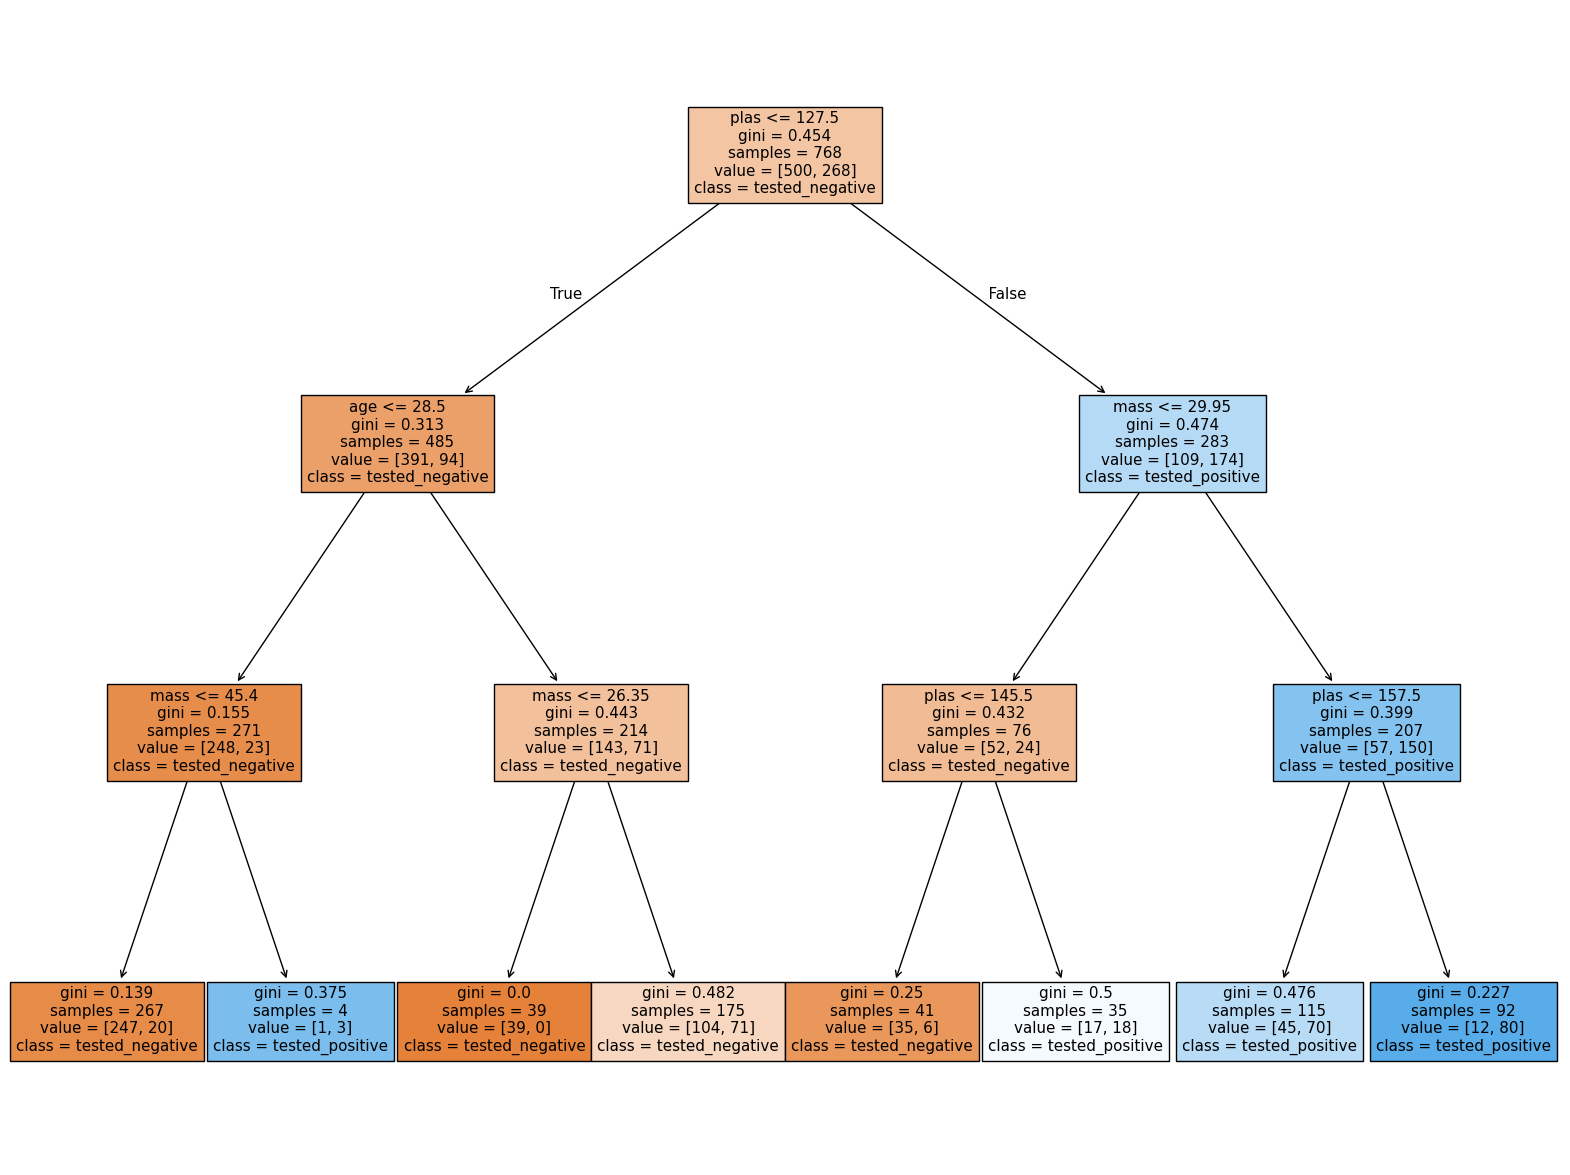

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

arbol_full = DecisionTreeClassifier(max_depth=3)
arbol_full.fit(X,y)

fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(arbol_full, feature_names=X.columns.tolist(), class_names=y.cat.categories.tolist(), filled=True, ax=ax)
plt.show()